## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

## Loading the Dataset

In [4]:
data = pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


## Inspect Data Structure

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


## Visualizing Stock Prices

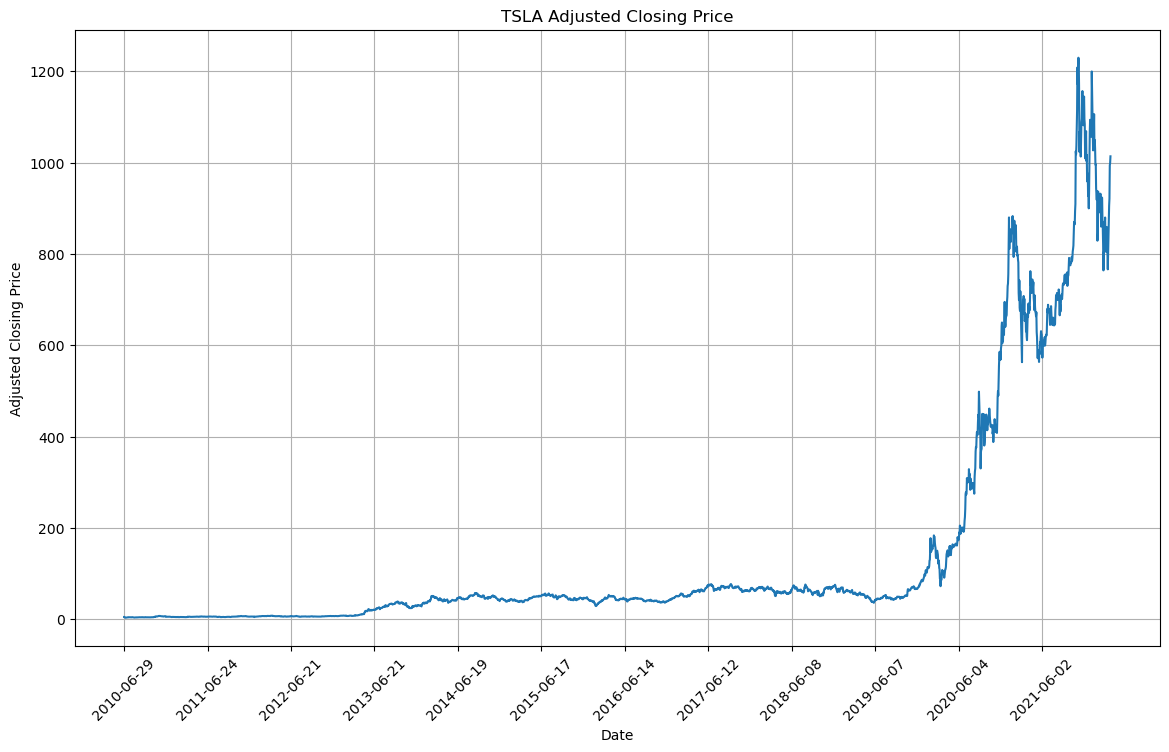

In [8]:
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Adj Close'])
plt.title('TSLA Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.xticks(np.arange(0, len(data), step=250), rotation=45)
plt.grid(True)
plt.show()

## Data Preprocessing - Extract 'Adj Close' Column

In [10]:
adj_close_prices = data['Adj Close'].values.reshape(-1, 1)

## Scaling the Data

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(adj_close_prices)

## Defining a Function to Create Sequences

In [14]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

## Set Sequence Length and Create Sequences

In [16]:
sequence_length = 60

X, y = create_sequences(scaled_data, sequence_length)

## Splitting Data into Training and Testing Sets

In [18]:
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (2316, 60, 1), X_test shape: (580, 60, 1)
y_train shape: (2316, 1), y_test shape: (580, 1)


## Building the GRU Model

In [20]:
from tensorflow.keras.layers import Input

def create_gru_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(50, return_sequences=True))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

## Creating and Summarizing the Model

In [22]:
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_gru_model(input_shape)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - loss: 2.2748e-04 - val_loss: 6.6685e-06
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 1.9897e-06 - val_loss: 6.9785e-06
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 1.8873e-06 - val_loss: 6.1583e-06
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 1.8841e-06 - val_loss: 6.2582e-06
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 1.8822e-06 - val_loss: 8.2064e-06
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.0157e-06 - val_loss: 5.7662e-06
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.0599e-06 - val_loss: 9.1469e-06
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 3.6415e-06 - val_loss: 8.7966e-06
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 3.0147e-06 - val_loss: 5.2568e-06
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.0710e-06 - val_loss: 5.1130e-06
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - los

## Evaluating the Model

In [26]:
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3.3916e-04
Test Loss: 0.0006815429078415036


## Visualizing Training and Validation Loss

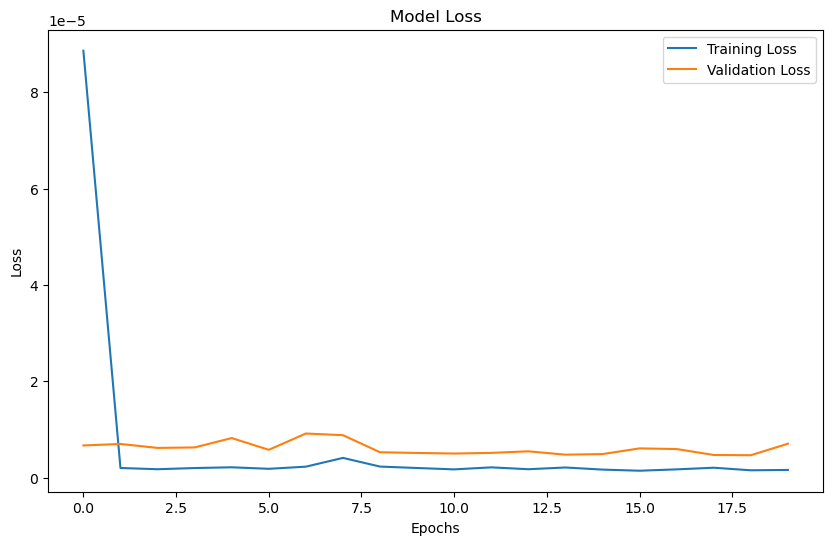

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Making Predictions and Plotting Results

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step


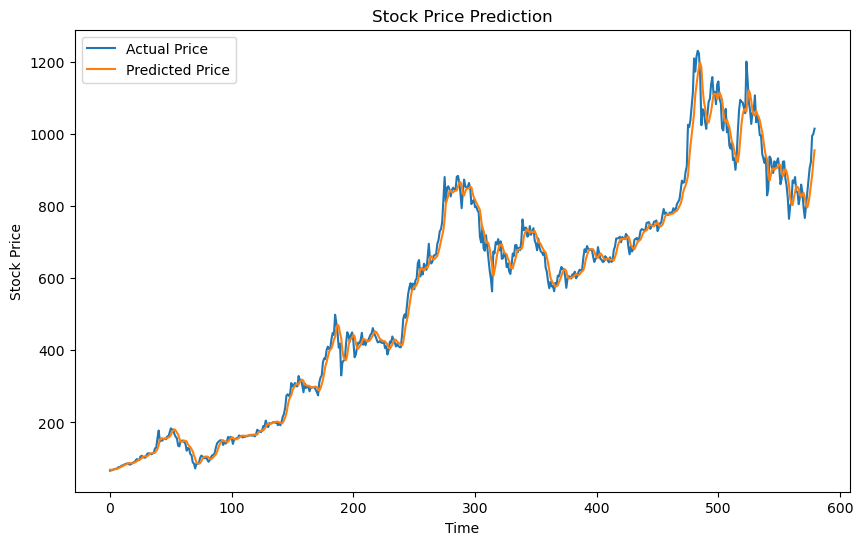

In [30]:
y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()